## Task-2
Исходные данные: Дан гибкий контракт на поставку газа на год, по которому покупатель суммарно может отобрать не более 1 (Годовое Контрактное Количество – ГКК), при этом его Минимальное Годовое Количество за год - МГК должно быть не менее 76.5 % от ГКК.
 
Также у покупателя есть Суточные Контактные Количества – СКК:
Покупатель имеет возможность каждый день в течении года менять отбор в диапазоне:
от 0.0009589 до 0.002884.

Задание: Построить область допустимых кумулятивных траекторий отбора газа покупателем.


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
daily_min = 0.0009589
daily_max = 0.002884
total_min = 0.765 # FUNCTION CONSTRAINT-1: the mean daily value for year cumulative 76.5%
total_max = 1.0 # FUNCTION CONSTRAINT-2: the mean daily value for year cumulative 100%
print(f'MIN: {np.around(total_min / 365, 7)}, {total_min}\n'
      f'MAX: {np.around(total_max / 365, 7)}, {total_max}')

MIN: 0.0020959, 0.765
MAX: 0.0027397, 1.0


In [19]:
min_profiles = []
max_profiles = []

for day in range(365):
    if (daily_max * (365 - day - 1) + np.sum(min_profiles) + daily_min) >= total_min:
        min_profiles.append(daily_min)
    else:
        min_profiles.append(daily_max)
        
    if (daily_min * (365 - day - 1) + np.sum(max_profiles) + daily_max) <= total_max:
        max_profiles.append(daily_max)
    else:
        max_profiles.append(daily_min)
        
min_profiles = np.array(min_profiles)
max_profiles = np.array(max_profiles)
min_data_df = pd.DataFrame(min_profiles)
max_data_df = pd.DataFrame(max_profiles)

In [26]:
np.min(min_profiles), np.max(min_profiles), np.min(max_profiles), np.max(max_profiles)

(0.0009589, 0.002884, 0.0009589, 0.002884)

In [27]:
np.sum(min_profiles), np.sum(max_profiles)

(0.7658201, 0.9987572000000001)

In [25]:
min_data_df_cum = min_data_df.cumsum()
max_data_df_cum = max_data_df.cumsum()

In [22]:
y_min = min_data_df_cum.values
y_max = max_data_df_cum.values

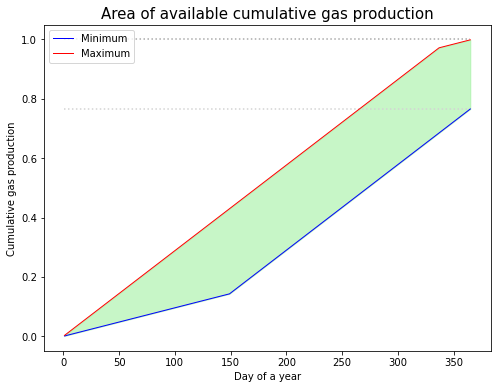

In [24]:
x =  np.linspace(1, 365, 365)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

ax.plot(x, y_min, linewidth=1, color="blue", label='Minimum')
ax.plot(x, y_max, linewidth=1, color="red", label='Maximum')
ax.fill_between(x, y_min.flatten(), y_max.flatten(), color='lightgreen', alpha=0.5)
ax.hlines(0.765, 1, 365, color='lightgrey', linestyle='dotted')
ax.hlines(1, 1, 365, color='darkgrey', linestyle='dotted')
ax.legend(loc='upper left')
ax.set_title('Area of available cumulative gas production', fontsize=15)
ax.set_ylabel('Cumulative gas production')
ax.set_xlabel('Day of a year')
plt.show()